In [10]:
using FileIO
using CUDA
using CUDA.CUFFT
using Plots
using StatsBase
using SampledSignals
using FixedPointNumbers

In [91]:
w(x) = reshape(x,128,125);
g(x) = CuArray(x);
ℱ(x) = rfft(x,1);
invℱ(x) = irfft(x,128,1);
H(x) = heatmap(collect(x));
interleave(c,s) = reshape(cat(c,s,dims=1),size(c,1),2*size(c,2));
deinterleave(x) = x[:,1:2:end] + 1im*x[:,2:2:end];
mse(x,x̂) = mean( (x-x̂) .^ 2 );
compand(x) = (1.0/1.0) * sign.(x) .* log.(1 .+ abs.(512*x));
express(x) = (1.0/51)* sign.(x) .* (exp.(1.0*abs.(x)) .- 1);

In [92]:
x = load("data/mini_speech_commands/down/004ae714_nohash_0.wav")
x₀ = Float32.(collect(x[:]));
x₀ = x₀ .- mean(x₀);

In [93]:
@time CUDA.@time begin
    𝐗 = (ℱ ∘ w ∘ g)(x₀);
    J = interleave(real(𝐗),imag(𝐗));
    Jₚ = express(round.(1*compand(J))/1);
    x̂ = collect((invℱ ∘ deinterleave)(Jₚ)[:])
end;

  0.174094 seconds (479.09 k CPU allocations: 23.695 MiB) (26 GPU allocations: 2.537 MiB, 0.08% memmgmt time)
  0.174296 seconds (479.30 k allocations: 23.704 MiB, 89.59% compilation time: 12% of which was recompilation)


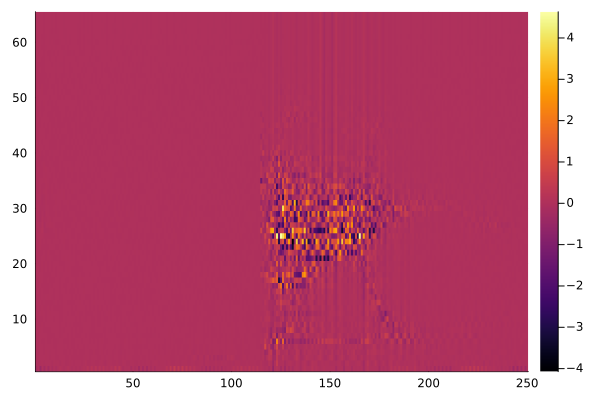

In [94]:
heatmap(collect(J))

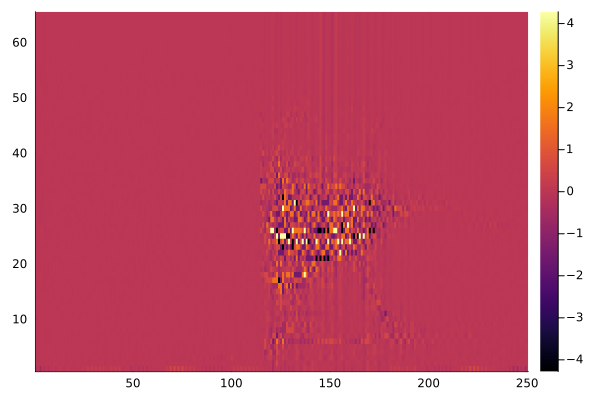

In [95]:
heatmap(collect(Jₚ))

In [96]:
histogram(collect(Jₚ)[:])

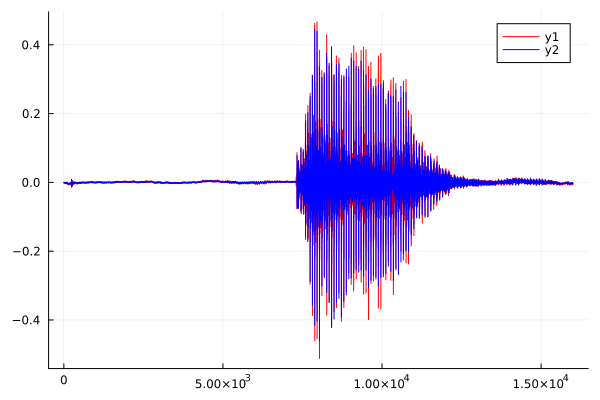

In [97]:
plot(x̂,c=:red)
plot!(x₀,c=:blue)

In [90]:
SampleBuf(Q0f15.(x̂),16000)

16000-frame, 1-channel SampleBuf{Q0f15, 1}
1.0s sampled at 16000.0Hz
▃▃▂▂▂▁▁▁▂▂▂▂▂▂▁▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▅▆▆▇▇▇▇▇▆▇▇▇▆▇▆▆▆▆▆▆▅▅▅▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▃▃▃

In [14]:
SampleBuf(Q0f15.(x₀),16000)

16000-frame, 1-channel SampleBuf{Q0f15, 1}
1.0s sampled at 16000.0Hz
▂▃▂▂▁▁▁▁▁▂▂▂▂▂▁▂▂▂▂▂▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▅▆▆▇▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂

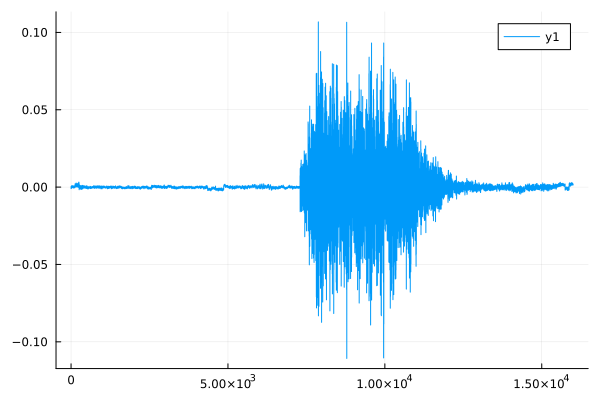

In [8]:
plot(x₀-x̂)

In [7]:
mse(x₀, x̂)

0.0001734972869584152

In [8]:
x̂₂ = express(round.(2*compand(x₀))/2);

In [9]:
mse(x₀, x̂₂)

0.0032788523511096557